<a href="https://colab.research.google.com/github/jdasam/mas1004-2023/blob/main/live_coding/3_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification
- In this notebook, we will practice binary classification using 2D inputs

In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import torch
torch.set_printoptions(sci_mode=False) # to print 1e-04 as 0.0001

## 1. Generate Dataset

### 1-1 XOR Gate
- XOR Gate is true when the two inputs are different and false when the two inputs are same
  - XOR(False, False) = False
  - XOR(False, True) = True
  - XOR(True, False) = True
  - XOR(True, True) = False
- In this example, we will use x > 0 as True
  
  
  


(torch.Size([500, 2]), torch.Size([500, 1]))

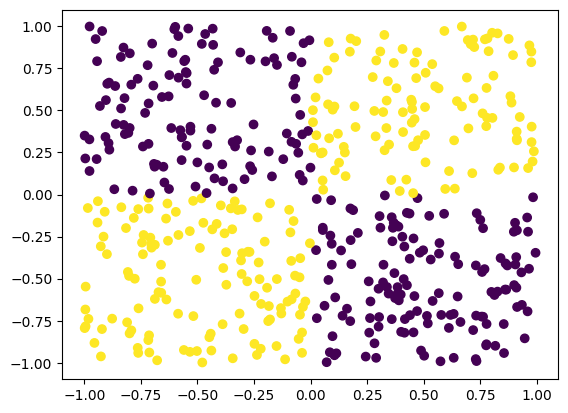

In [2]:
# make XOR gate dataset
N = 500
data = np.random.uniform(-1, 1, (N, 2))


### 1-2 Spiral Data
- This is another example of 2D binary classification

In [3]:

# make spiral data
# https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5
N = 500
noise_weight = 1.0
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
data_a = data_a + np.random.randn(N,2) * noise_weight

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
data_b = data_b + np.random.randn(N,2) * noise_weight

data = np.append(data_a, data_b, axis=0)
label = np.append(np.zeros(N), np.ones(N))

randomize_order = np.random.permutation(len(data))
data = data[randomize_order] # shuffle
label = label[randomize_order] # shuffle label with same order

data = torch.from_numpy(data).float()
label = torch.from_numpy(label).float().unsqueeze(1)


print(data.shape, label.shape)
plt.scatter(data[:,0], data[:,1], c=label)

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [5]:
# Function for visualizing decision boundary of the model
def visualize_decision_boundary(model, data, label):
  x_linspace = torch.linspace(min(data[:,0]), max(data[:,0]), steps=200)
  y_linspace = torch.linspace(min(data[:,1]), max(data[:,1]), steps=200)
  grid_x, grid_y = torch.meshgrid(x_linspace, y_linspace)
  grid_xy = torch.stack([grid_x, grid_y]).permute(1,2,0)
  grid_xy = grid_xy.view(-1, 2)
  value_by_grid = model(grid_xy)
  value_by_grid = value_by_grid.view(200, 200, 1)
  value_by_grid[value_by_grid<=0.5] = 0
  value_by_grid[value_by_grid>0.5] = 1

  plt.scatter(x=data[label[:,0]==0,0], y=data[label[:,0]==0,1])
  plt.scatter(x=data[label[:,0]==1,0], y=data[label[:,0]==1,1])

  plt.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), value_by_grid.detach().numpy().squeeze(), alpha=0.3)

## 2. Inspect Dataset

## 4. Using Different Loss
- Binary Cross Entropy
  - Cross Entropy measures the average number of bits (amount of information) needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution $q$, rather than the true distribution $p$
    - If the two distributions are same, the cross entropy becomes the minimum value, original entropy
      - In supervised-learning such as classification task, the original entropy is zero, so minimum cross entropy is zero

    - If the two distributions are different, the cross entropy becomes larger
  - Binary cross entropy compares when there is only one probability on binary class.
  - $L = -\frac{1}{N}\sum_{n=1}^N y_n\log(\hat{y}_n) + (1-y_n)\log(1-\hat{y}_n)$
    - $y_n$: true label
    - $\hat{y}_n$: predicted label

  - $\hat{y}$ is usually output of sigmoid function
  - sigmoid function: $y = \frac{1}{1+e^{-x}}$


## NN can memorize everything!

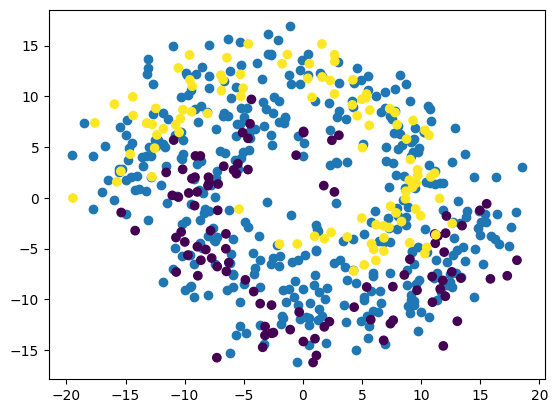

In [84]:

# make spiral data
# https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5
N = 50
noise_weight = 3.0

def create_spiral_dataset(N, noise_weight):

  theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

  r_a = 2*theta + pi
  data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
  data_a = data_a + np.random.randn(N,2) * noise_weight

  r_b = -2*theta - pi
  data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
  data_b = data_b + np.random.randn(N,2) * noise_weight

  data = np.append(data_a, data_b, axis=0)
  label = np.append(np.zeros(N), np.ones(N))

  randomize_order = np.random.permutation(len(data))
  data = data[randomize_order] # shuffle

  # randomize_order = np.random.permutation(len(data))
  label = label[randomize_order] # shuffle label with different order

  data = torch.from_numpy(data).float()
  label = torch.from_numpy(label).float().unsqueeze(1)

  return data, label

train_data, train_label = create_spiral_dataset(200, 2.0)
test_data, test_label = create_spiral_dataset(100, 2.0)

# test_data = torch.from_numpy(data).float()
# test_label = torch.from_numpy(label).float().unsqueeze(1)


# print(test_data.shape, test_label.shape)
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)